# Entrega 1: Proyecto Inteligencia de Negocio
Para la primera entrega del proyecto se realizo un analisis de texto para clasificar mensajes SMS o de texto que fuera spam  no. Con tal proposito se relaizaron las siguientes operaciones sobre el conjunto de datos.

## Importaciones

In [1]:
import nltk 
import graphviz 
import string
import re
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from progressbar import ProgressBar
import random
from imblearn.over_sampling import RandomOverSampler, SMOTE

## Modelo y Entrenamiento
Lo primero que se realizo fueron las particiones para los conjuntos de entrenamiento y prueba.

In [2]:
df_train, df_test = pd.read_csv("./train.csv"), pd.read_csv("./test.csv")

## Tokenizacion
Luego se tokenizaron las palabras de los documentos del conjunto de entreno y a partir de esta tokenizacion se aplico a la los otros conjuntos. Ciertas decisiones de diseño se tomaron en esta parte del modelamiento como se utilizo una estrategia binaria para generar la bolsa de palabras y se opto por no utilizar una estrategia TF-IDF, esto porque los resultados eran peores. Asi mismo, una vez reazada la tokenizacion a los diferentes conjuntos no se realizo un sobremuestreo de la clase minoritaria del conjunto de entrenamiento. Todo esto por los resultados obtenidos en el cuaderno de validacion cruzada. 

In [3]:
vect = CountVectorizer(binary=True)
vect.fit(df_train["text"])
train_encoded = vect.transform(df_train["text"])
test_encoded = vect.transform(df_test["text"])

In [4]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=19)
clf.fit(train_encoded, df_train["spam"])
train_info = {"confusion_matrix": confusion_matrix(df_train["spam"], clf.predict(train_encoded)), 
              "report": classification_report(df_train["spam"], clf.predict(train_encoded), output_dict=True)}
test_info = {"confusion matrix": confusion_matrix(df_test["spam"], clf.predict(test_encoded)),
             "report": classification_report(df_test["spam"], clf.predict(test_encoded), output_dict=True)}

Finalmente se calculo la precision, sensibilidad, procentaje de acierto y matrices de confusion para los diferentes conjuntos. Como se puede ver a continuacion se esta incurriendo en sobre muestro ya que las metricas para el conjunto de entreno estan cerca a 1 mientras que para el conjunto de prueba estan cerca de .9, sin embargo este continua siendo un buen resultado lo que implica que el modelo si es capaz de generalizar a muestras de las que no fue entrenado. Las graficas de las matrices de confusion estan en el siguientes orden: entrenamiento y prueba. Ahora, dado que en la vida real se busca simplificar al maximo los modelos tanto por facilidad de entendimiento como para facilitar la generalizacion a nuevos datos en el futuro se redujo la profundidad del arbol a solo 20 niveles (comparado al 192 del mejor modelo). 

In [5]:
train_info["report"], test_info["report"]

({'0': {'precision': 0.9854368932038835,
   'recall': 1.0,
   'f1-score': 0.9926650366748166,
   'support': 3857},
  '1': {'precision': 1.0,
   'recall': 0.9046822742474916,
   'f1-score': 0.9499561018437226,
   'support': 598},
  'accuracy': 0.9872053872053872,
  'macro avg': {'precision': 0.9927184466019418,
   'recall': 0.9523411371237458,
   'f1-score': 0.9713105692592696,
   'support': 4455},
  'weighted avg': {'precision': 0.9873917165179301,
   'recall': 0.9872053872053872,
   'f1-score': 0.9869321650633702,
   'support': 4455}},
 {'0': {'precision': 0.9773895169578622,
   'recall': 0.9854922279792746,
   'f1-score': 0.9814241486068112,
   'support': 965},
  '1': {'precision': 0.900709219858156,
   'recall': 0.8523489932885906,
   'f1-score': 0.8758620689655171,
   'support': 149},
  'accuracy': 0.9676840215439856,
  'macro avg': {'precision': 0.9390493684080091,
   'recall': 0.9189206106339326,
   'f1-score': 0.9286431087861642,
   'support': 1114},
  'weighted avg': {'precisio

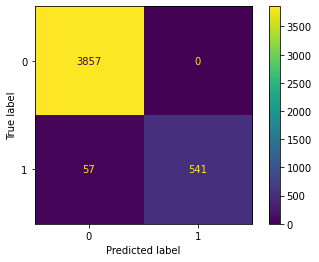

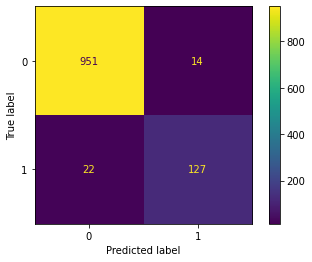

In [6]:
plot_confusion_matrix(clf, train_encoded, df_train["spam"])
plot_confusion_matrix(clf, test_encoded, df_test["spam"])

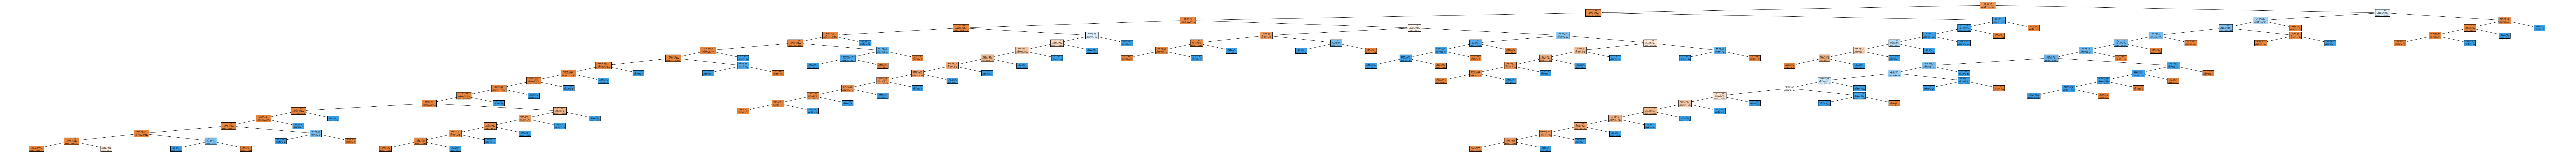

In [22]:
plt.figure(figsize=(200,12))
plot_tree(clf, max_depth=20, feature_names=vect.get_feature_names(), filled=True, fontsize=6)
plt.savefig("./Tree Graph.jpeg",  dpi=100)

In [7]:
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data =export_graphviz(clf, out_file=None,   
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data, dpi=100)